Taller 2 Métodos computacionales 2

Catalina Fuentes y Silvana Archila

1. Ciclo de actividad solar

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_21416\3875180963.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('datos.dat', sep='\s+', names=['Year', 'Month', 'Day', 'SSN'],skiprows=1)


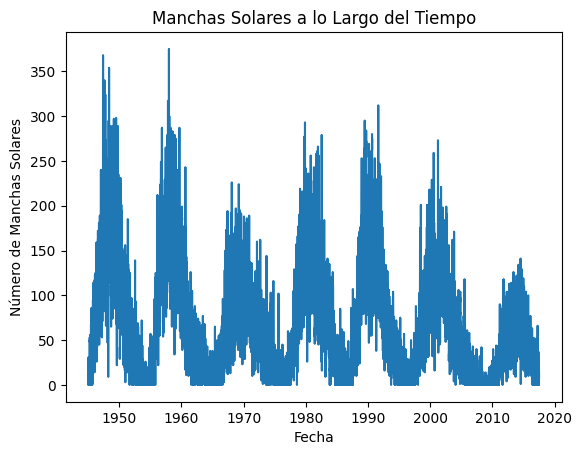

In [8]:
#Descarga de datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('datos.dat', sep='\s+', names=['Year', 'Month', 'Day', 'SSN'],skiprows=1)
df['fecha'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.set_index('fecha', inplace=True)
plt.plot(df['SSN'])
plt.xlabel('Fecha')
plt.ylabel('Número de Manchas Solares')
plt.title('Manchas Solares a lo Largo del Tiempo')
plt.show()

In [9]:
fft_manchas = np.fft.fft(df['SSN'])
frecuencias = np.fft.fftfreq(len(df), d=1)  # Asumiendo que los datos son diarios
indice_fp = np.argmax(np.abs(fft_manchas[1:])) + 1  # +1 para ignorar la componente de frecuencia cero
fp = frecuencias[indice_fp]
periodo_dias = 1 / fp
periodo_anios = periodo_dias / 365.25  # Considerando años bisiestos

print(f"El período del ciclo solar es aproximadamente {periodo_anios:.2f} años.")

El período del ciclo solar es aproximadamente 73.00 años.
